<a href="https://colab.research.google.com/github/RayedShamim/Default-of-Credit-Card-Clients-Classification-Project/blob/main/Default_of_Credit_Card_Clients_Classification_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Default of Credit Card Clients Classification Capstone Project
### by Rayed Shamim Syed Mohammed



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/RayedShamim/Default-of-Credit-Card-Clients-Classification-Project/tree/main


# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
import warnings

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/RayedShamim/Default-of-Credit-Card-Clients-Classification-Project/main/default%20of%20credit%20card%20clients.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23                           Y  
0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0         0                           1  
2      1000         0      2000                           1  
3      1000      1000      5000                           0  
4      1100      1069      1000                           0  

[5 rows x 25 columns]

In [5]:
# Correcting Column Names
df1 = df.copy()
df1.columns = [ele for ele in list(df.loc[0,:])]
df1.drop(0,inplace=True)
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
df1.drop
df1.head()

ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  ...  \
1  1     20000   2         2        1  24     2     2    -1    -1  ...   
2  2    120000   2         2        2  26    -1     2     0     0  ...   
3  3     90000   2         2        2  34     0     0     0     0  ...   
4  4     50000   2         2        1  37     0     0     0     0  ...   
5  5     50000   1         2        1  57    -1     0    -1     0  ...   

  BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5  \
1         0         0         0        0      689        0        0        0   
2      3272      3455      3261        0     1000     1000     1000        0   
3     14331     14948     15549     1518     1500     1000     1000     1000   
4     28314     28959     29547     2000     2019     1200     1100     1069   
5     20940     19146     19131     2000    36681    10000     9000      689   

  PAY_AMT6 default payment next month  
1        0                          1  
2     2000                          1  
3     5000                          0  
4     1000                          0  
5      679                          0  

[5 rows x 25 columns]

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df1.shape

(30000, 25)

### Dataset Information

In [8]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
len(df1[df1.duplicated()])

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df1.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<Axes: >

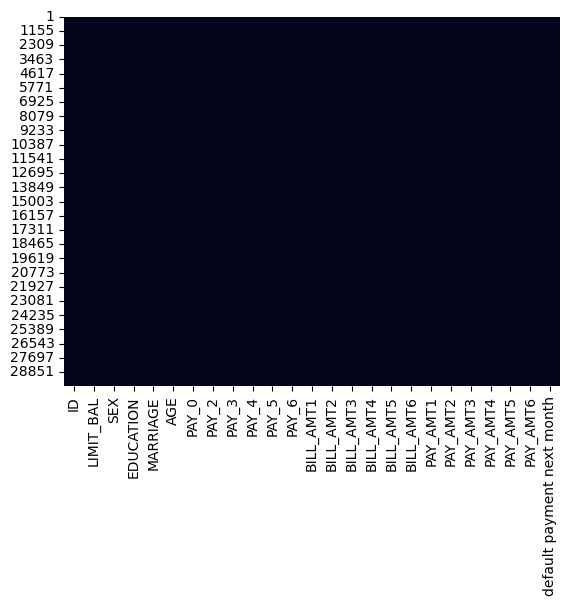

In [11]:
# Visualizing the missing values
sns.heatmap(df1.isnull(),cbar=False)

### What did you know about your dataset?

There are 30,000 rows and 25 columns in the dataset. There are no missing or null values in the dataset. Also there are no duplicate values present.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [13]:
# Dataset Describe
# converting object/STRING --> INT
df2 = df1.astype(np.int64)

df2.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

### Variables Description

##Credit Card Client
* ID: Customer ID
* LIMIT_BAL: Credit Limit
* SEX: Male/Female
* EDUCATION: Level of Education
* MARRIAGE: Married/Un-married
* AGE: Age of the client
* [PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6]: Client Payment History
* [BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6]: Bill Amount History
* [PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6]: Payment Amount History

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for col in df2.columns:
  print(f'The number of unique values in the column {col} is {df2[col].nunique()}')

The number of unique values in the column ID is 30000
The number of unique values in the column LIMIT_BAL is 81
The number of unique values in the column SEX is 2
The number of unique values in the column EDUCATION is 7
The number of unique values in the column MARRIAGE is 4
The number of unique values in the column AGE is 56
The number of unique values in the column PAY_0 is 11
The number of unique values in the column PAY_2 is 11
The number of unique values in the column PAY_3 is 11
The number of unique values in the column PAY_4 is 11
The number of unique values in the column PAY_5 is 10
The number of unique values in the column PAY_6 is 10
The number of unique values in the column BILL_AMT1 is 22723
The number of unique values in the column BILL_AMT2 is 22346
The number of unique values in the column BILL_AMT3 is 22026
The number of unique values in the column BILL_AMT4 is 21548
The number of unique values in the column BILL_AMT5 is 21010
The number of unique values in the column B

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
df_def = df2[df2['default payment next month'] == 1]

# Finding which clients default in Credit Limit Category
limit_bal_def = df_def.groupby('LIMIT_BAL').agg({'default payment next month':'count'}).sort_values(by='default payment next month',ascending=False).head(10)
limit_bal_def

default payment next month
LIMIT_BAL                            
50000                             885
20000                             698
30000                             568
80000                             363
100000                            272
200000                            270
60000                             233
70000                             210
10000                             197
150000                            187

In [16]:
# Number of clients that are defaulting genderwise

gender_def = df_def.groupby('SEX').agg({'default payment next month':'count'}).sort_values(by='default payment next month',ascending=False).head(10)
gender_def

default payment next month
SEX                            
2                          3763
1                          2873

In [17]:
# Number of clients that are defaulting education wise
education_def = df_def.groupby('EDUCATION').agg({'default payment next month':'count'}).sort_values(by='default payment next month',ascending=False).head(10)
education_def

default payment next month
EDUCATION                            
2                                3330
1                                2036
3                                1237
5                                  18
6                                   8
4                                   7

In [18]:
# Number of clients that are defaulting marriage wise
marriage_def = df_def.groupby('MARRIAGE').agg({'default payment next month':'count'}).sort_values(by='default payment next month',ascending=False).head(10)
marriage_def

default payment next month
MARRIAGE                            
2                               3341
1                               3206
3                                 84
0                                  5

In [19]:
# number of clients that are defaulting age wise
age_def = df_def.groupby('AGE',as_index=False).agg({'default payment next month':'count'}).sort_values(by='default payment next month',ascending=False).head(30)
age_def

AGE  default payment next month
6    27                         313
8    29                         313
4    25                         302
3    24                         300
7    28                         286
9    30                         274
15   36                         254
5    26                         253
2    23                         247
13   34                         231
16   37                         229
10   31                         229
14   35                         226
11   32                         225
12   33                         215
18   39                         199
17   38                         194
19   40                         187
21   42                         185
20   41                         185
1    22                         169
23   44                         162
25   46                         157
22   43                         150
26   47                         120
28   49                         119
24   45                         116
27   48                         104
29   50                         101
30   51                          88

### What all manipulations have you done and insights you found?

The original dataset contained two rows of column names. The first row had only written X1, X2, X3... and Y, wereas the second column had meaning labels for columns. Therefore the second row of columns were converted into actual column labels replacing X1, X2, X3 and so on.

From my analysis, I came to that clients which had a credit limit of 50,000 defaulted followed by 20,000 and 30,000. Also clients with gender class 2 defaulted the most in comparison to gender class 1. And clients that belonged to education class 2 defaulted the most followed education class 1 and 3. And clients that belonged to marriage class 2 defaulted the most followed marriage class 1. And finally, clients that belonged to age group 27 to 29 defaulted the most.

So in conclusion we can say that if a particular client has a credit limit of 50,000, is of the gender class 2, has a education of class 2, and belongs to marriage class 2, and belongs to age group 27 to 29, this client has a very high chance to default.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Credit Card limit default Frequency (Univariate)

Text(0.5, 1.0, 'Credit limit vs defaults')

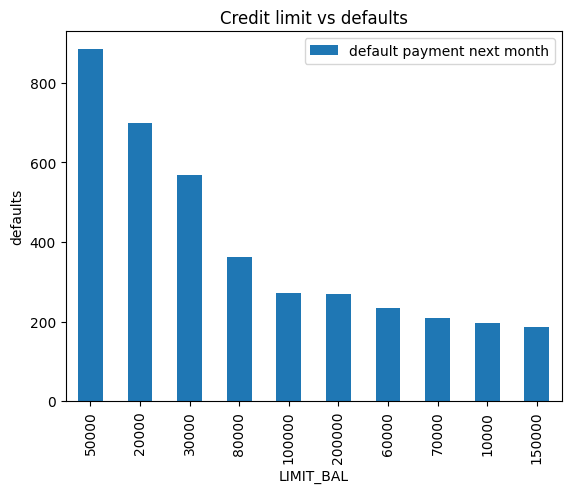

In [20]:
# Chart - 1 visualization code
limit_bal_def.plot(kind='bar')
plt.ylabel('defaults')
plt.title('Credit limit vs defaults')

##### 1. Why did you pick the specific chart?

A bar chart is used to show frequency or percentages of variables in a dataset. Hence this chart was used to show the frequency of defaults in different credit limit categories.

##### 2. What is/are the insight(s) found from the chart?

As we can see from the above graph that clients with credit limit of 50,000 has the highest frequency of defaults.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

A business can learn that if a client applies for a credit card of limit 50,000 the probability of default is higher.

#### Chart - 2 Client Gender Class wise default (Bi-variate analysis)

Text(0.5, 1.0, 'Client default ratio gender wise')

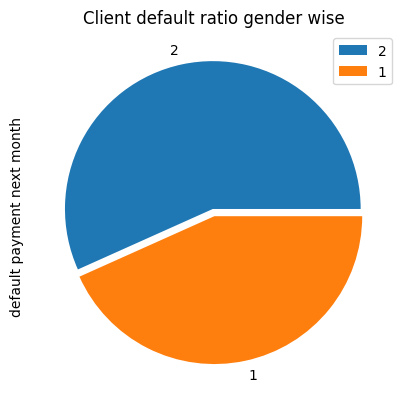

In [21]:
# Chart - 2 Analysing the number of defaults gender wise
gender_def.plot(kind='pie',subplots=True,explode=[0.05,0])
plt.title('Client default ratio gender wise')

##### 1. Why did you pick the specific chart?

A pie chart is used to show part-in-total values of the dataset. Here we use this chart to show the total number of defaults of clients gender wise.

##### 2. What is/are the insight(s) found from the chart?

Here we see that clients with gender class 2 had higher portion of defaults than gender class 1.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

A credit card business can learn that if individual is applying for a credit card and belongs to gender class 2, then the chance of default is somewhat higher.

#### Chart - 3 Client defaults by level of education (Univariate)

Text(0.5, 1.0, 'Education Level vs number of defaults')

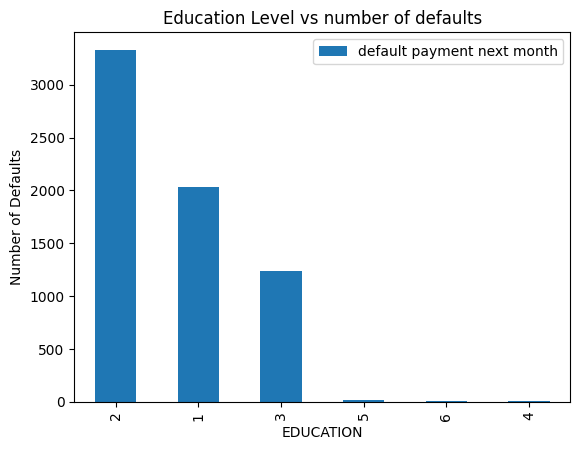

In [22]:
# Chart - 3 visualization code
education_def.plot(kind='bar')
plt.ylabel('Number of Defaults')
plt.title('Education Level vs number of defaults')

##### 1. Why did you pick the specific chart?

A bar chart is used to show frequency or percentages of variables in a dataset. Hence this chart was used to show the frequency of defaults in different education levels of clients.

##### 2. What is/are the insight(s) found from the chart?

As we can see that a large number of datapoint present in class 2, 1 and 3. This expains that people with less education tend to default.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From a business prespective, one can learn that if a client is applying for a credit card, then they should have atleast a minimum qualification of class 3 or higher.

#### Chart -  Client defaults marriage status wise

Text(0.5, 1.0, 'Marriage status vs default')

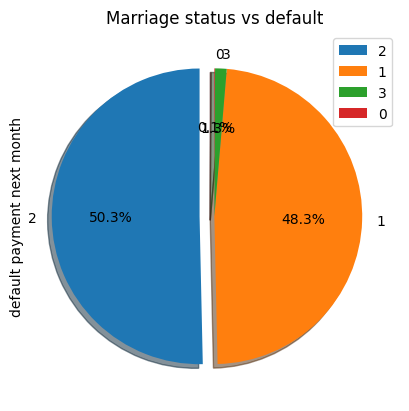

In [23]:
# Chart - 4 visualization code
explode=[0.1,0,0,0]
marriage_def.plot(kind='pie',
                  subplots=True,
                  autopct='%1.1f%%',
                  explode=explode,
                  shadow=True,startangle=90)
plt.title('Marriage status vs default')

##### 1. Why did you pick the specific chart?

A pie chart is used to show part-in-total values of the dataset. Here we use this chart to show the total ratio of defaults of clients marriage wise.

##### 2. What is/are the insight(s) found from the chart?

As we can see that clients with marriage status 1 and 2 are defaulting the most.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From a business perspective, one can learn that if a client is applying for a credit card and has a marriage status of 2 or 1, then the chance of default is very high.

#### Chart - 5 Age distribution of clients that defaulted (Bi-variate)

Text(0.5, 0, 'Age group of clients')

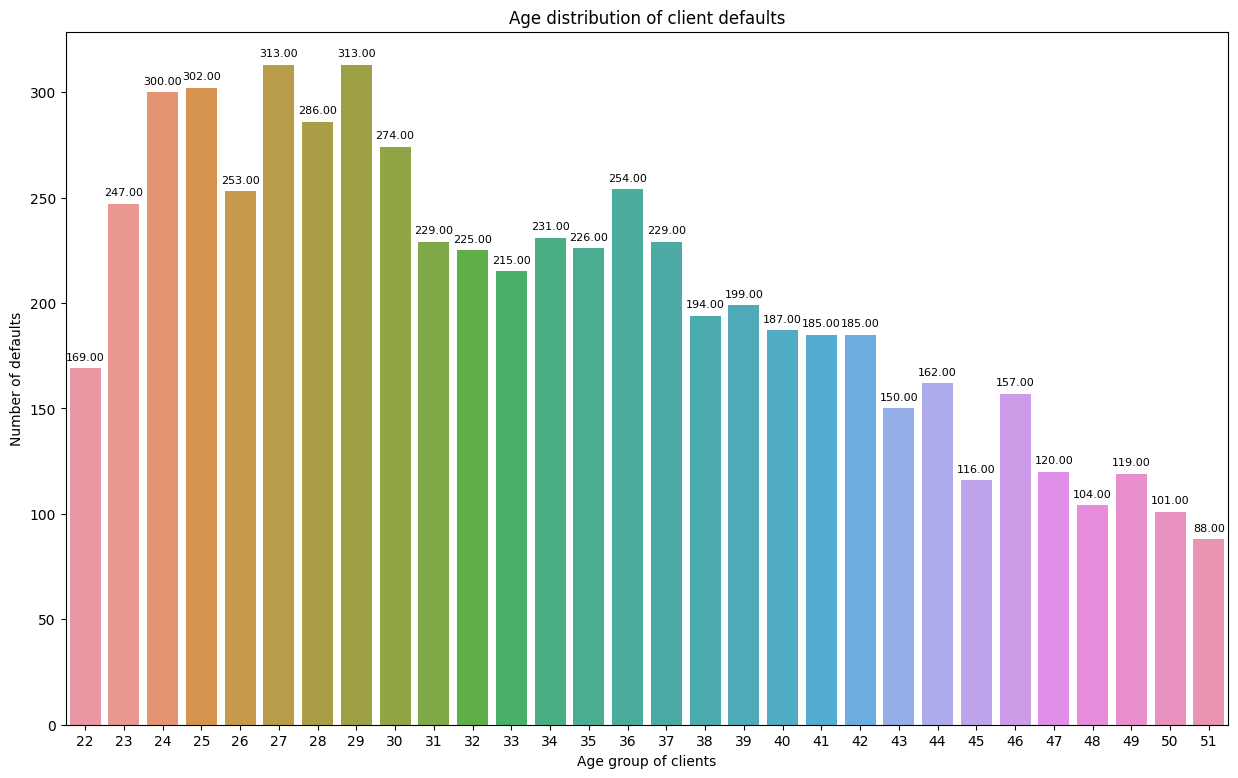

In [24]:
# Chart - 5 visualization code
fig = plt.figure(figsize=(15,9))
ax = fig.gca()
x = age_def['AGE']
y = age_def['default payment next month']
plots = sns.barplot(x=x,y=y)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                   textcoords='offset points')
ax.set_title('Age distribution of client defaults')
ax.set_ylabel('Number of defaults')
ax.set_xlabel('Age group of clients')


##### 1. Why did you pick the specific chart?

A bar chart is used to show frequency or percentages of variables in a dataset. Hence this chart was used to show the frequency of defaults in different education levels of clients.

##### 2. What is/are the insight(s) found from the chart?

As we can see that people of younger age group are defaulting more than people of older age group. The peak especially at age 27 and 29.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From a business perspective, one can learn that if a client is trying to apply for a credit card and belongs to age group 20s, then the probability of default is high.

#### Chart - 14 - Correlation Heatmap

<Axes: >

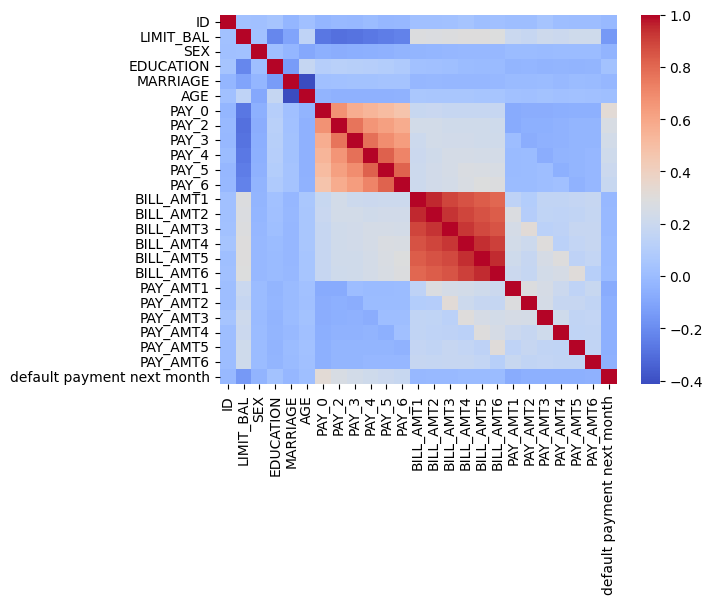

In [25]:
# Correlation Heatmap visualization code
sns.heatmap(df2.corr(),cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Correlation heatmap are generally used to visualize corelation/dependency of one variable with the other.

Therefore here we can see that correlation between variables such as Id, credit limit, gender, education, marriage, age, payment history, bill amount history and payment amount history.

##### 2. What is/are the insight(s) found from the chart?

The only strong correlation that can be seen here are bill amount histories and payment histories.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [26]:
# Handling Missing Values & Missing Value Imputation
df2.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

As we can see, there are no missing values in the dataset.

### 2. Handling Outliers

In [27]:
# Handling Outliers & Outlier treatments
# Checking for outliers
df2.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

<Axes: >

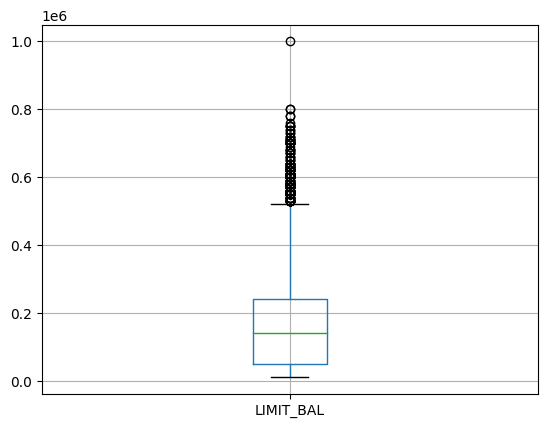

In [28]:
df2.boxplot(column='LIMIT_BAL')

In [29]:
df2[df2['LIMIT_BAL'] == 1000000]

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
2198  2198    1000000    2          1         1   47      0      0      0   

      PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
2198     -1  ...     891586     927171     961664     50784     50723   

      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
2198    896040     50000     50000     50256                           0  

[1 rows x 25 columns]

In [30]:
# Removing rows that have credit limit of 1,000,000
df3 = df2[df2['LIMIT_BAL'] != 1000000]

##### What all outlier treatment techniques have you used and why did you use those techniques?

The outlier removal technique used was boolean indexing in which the undesired rows were removed based on applying a condition. In this case the condition was that any row that had one million as the credit limit was removed.

Because this value was very distant from the rest of the population and can cause abnormal results.

### 3. Categorical Encoding

In [31]:
# Checking if encoding is necessary
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          29999 non-null  int64
 1   LIMIT_BAL                   29999 non-null  int64
 2   SEX                         29999 non-null  int64
 3   EDUCATION                   29999 non-null  int64
 4   MARRIAGE                    29999 non-null  int64
 5   AGE                         29999 non-null  int64
 6   PAY_0                       29999 non-null  int64
 7   PAY_2                       29999 non-null  int64
 8   PAY_3                       29999 non-null  int64
 9   PAY_4                       29999 non-null  int64
 10  PAY_5                       29999 non-null  int64
 11  PAY_6                       29999 non-null  int64
 12  BILL_AMT1                   29999 non-null  int64
 13  BILL_AMT2                   29999 non-null  int64
 14  BILL_A

#### What all categorical encoding techniques have you used & why did you use those techniques?

There is no need for categorical encoding, because we can see that all the columns are already encoded in numerical format.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [32]:
# Manipulate Features to minimize feature correlation and create new features

# Removing Client ID column
df4 = df3.drop(columns='ID',axis=1)
df4

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
1          20000    2          2         1   24      2      2     -1     -1   
2         120000    2          2         2   26     -1      2      0      0   
3          90000    2          2         2   34      0      0      0      0   
4          50000    2          2         1   37      0      0      0      0   
5          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29996     220000    1          3         1   39      0      0      0      0   
29997     150000    1          3         2   43     -1     -1     -1     -1   
29998      30000    1          2         2   37      4      3      2     -1   
29999      80000    1          3         1   41      1     -1      0      0   
30000      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
1         -2  ...          0          0          0         0       689   
2          0  ...       3272       3455       3261         0      1000   
3          0  ...      14331      14948      15549      1518      1500   
4          0  ...      28314      28959      29547      2000      2019   
5          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29996      0  ...      88004      31237      15980      8500     20000   
29997      0  ...       8979       5190          0      1837      3526   
29998      0  ...      20878      20582      19357         0         0   
29999      0  ...      52774      11855      48944     85900      3409   
30000      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1             0         0         0         0                           1  
2          1000      1000         0      2000                           1  
3          1000      1000      1000      5000                           0  
4          1200      1100      1069      1000                           0  
5         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29996      5003      3047      5000      1000                           0  
29997      8998       129         0         0                           0  
29998     22000      4200      2000      3100                           1  
29999      1178      1926     52964      1804                           1  
30000      1430      1000      1000      1000                           1  

[29999 rows x 24 columns]

#### 2. Feature Selection

In [33]:
# Select your features wisely to avoid overfitting
def calculate_vif(data):

  cols = data.columns
  vif_values = [variance_inflation_factor(data.values, ele) for ele in np.arange(data.shape[1])]

  vif = pd.DataFrame({'Columns': cols,'vif': vif_values})

  return vif

In [34]:
# Checking for multicolinearity
calculate_vif(df4)

Columns        vif
0                    LIMIT_BAL   4.035383
1                          SEX   9.104424
2                    EDUCATION   6.731376
3                     MARRIAGE   6.287798
4                          AGE  11.051532
5                        PAY_0   1.996616
6                        PAY_2   3.215477
7                        PAY_3   3.728986
8                        PAY_4   4.445158
9                        PAY_5   4.988587
10                       PAY_6   3.464275
11                   BILL_AMT1  20.789625
12                   BILL_AMT2  38.285951
13                   BILL_AMT3  31.740078
14                   BILL_AMT4  29.891270
15                   BILL_AMT5  35.838534
16                   BILL_AMT6  21.340473
17                    PAY_AMT1   1.917641
18                    PAY_AMT2   2.384771
19                    PAY_AMT3   1.936011
20                    PAY_AMT4   1.816510
21                    PAY_AMT5   1.856104
22                    PAY_AMT6   1.270394
23  default payment next month   1.450939

In [35]:
calculate_vif(df4[[col for col in df4.columns if col not in ['BILL_AMT2','BILL_AMT5','BILL_AMT3','BILL_AMT4','AGE']]])

Columns       vif
0                    LIMIT_BAL  3.620939
1                          SEX  8.135973
2                    EDUCATION  5.040146
3                     MARRIAGE  6.142500
4                        PAY_0  1.996081
5                        PAY_2  3.210534
6                        PAY_3  3.706353
7                        PAY_4  4.430259
8                        PAY_5  4.966803
9                        PAY_6  3.454445
10                   BILL_AMT1  4.642397
11                   BILL_AMT6  5.097358
12                    PAY_AMT1  1.349946
13                    PAY_AMT2  1.265120
14                    PAY_AMT3  1.323153
15                    PAY_AMT4  1.285355
16                    PAY_AMT5  1.321259
17                    PAY_AMT6  1.236123
18  default payment next month  1.425438

##### What all feature selection methods have you used  and why?

I have used the variance inflation factor method. This method tells us how can variance increase if a new variable was added. A variance inflation factor of 10 or less is considered to be desirable.

##### Which all features you found important and why?

Following features were selected because they had a VIF factor of 10 or less: -

* LIMIT_BAL
* SEX
* EDUCATION
* MARRIAGE
* PAY_0
* PAY_2
* PAY_3
* PAY_4
* PAY_5
* PAY_6
* BILL_AMT1
* BILL_AMT6
* PAY_AMT1
* PAY_AMT2
* PAY_AMT3
* PAY_AMT4
* PAY_AMT5
* PAY_AMT6

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

<ipython-input-36-3d7edc905586>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(9, 6))


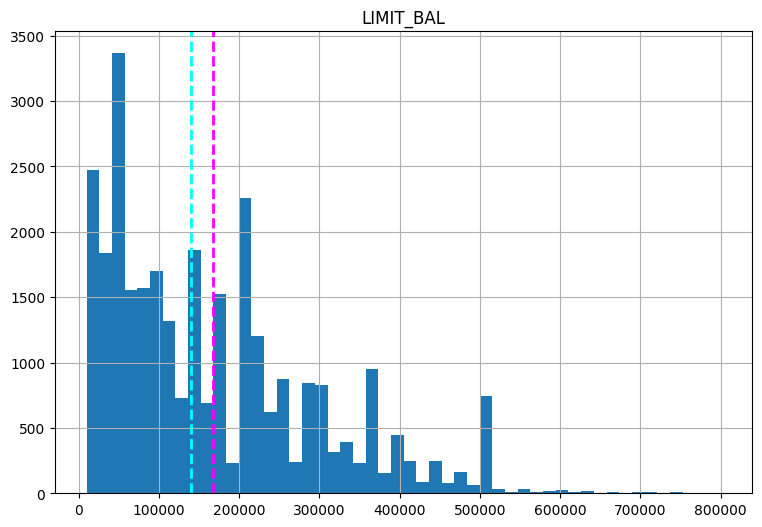

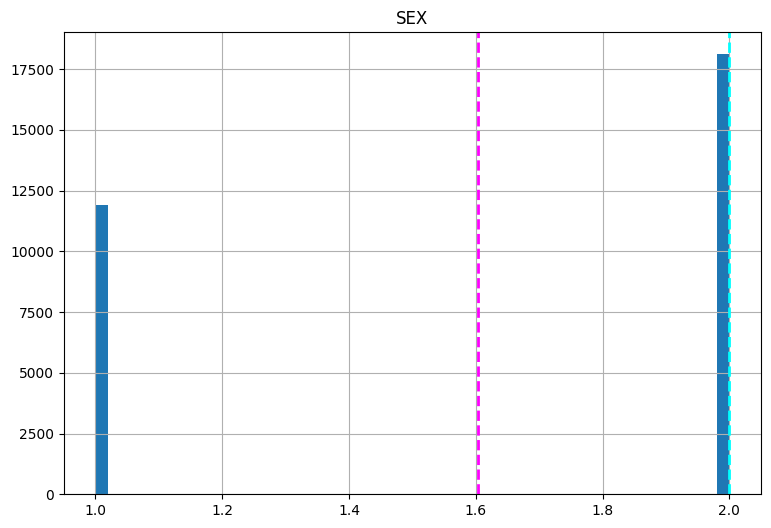

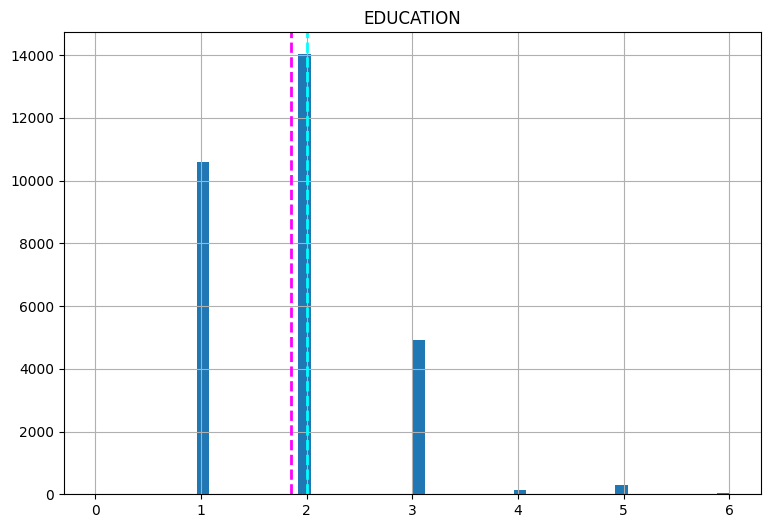

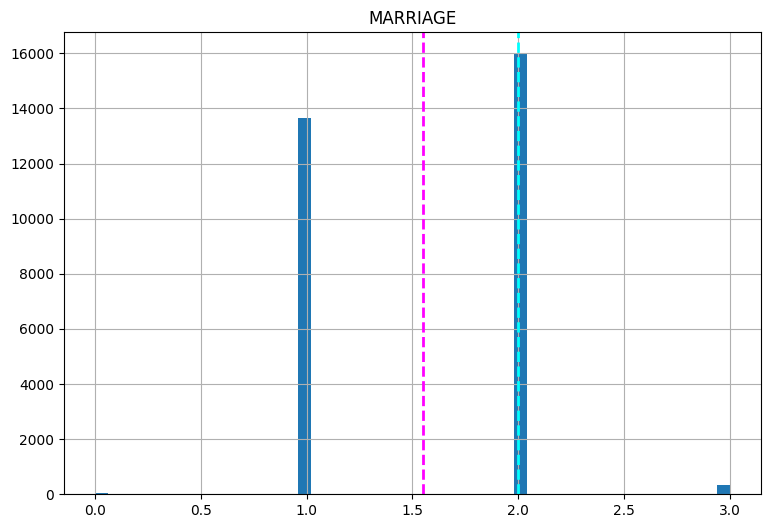

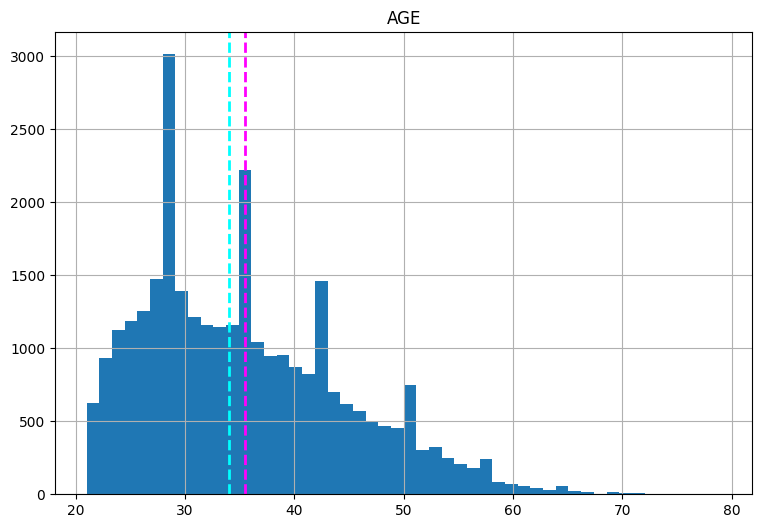

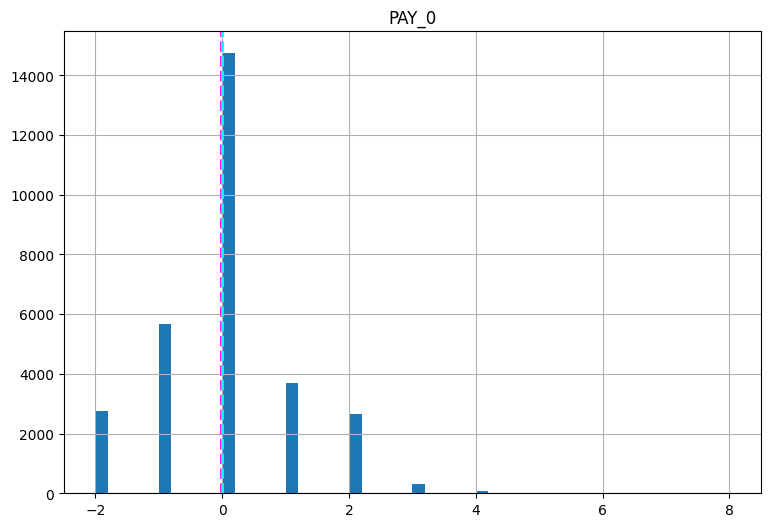

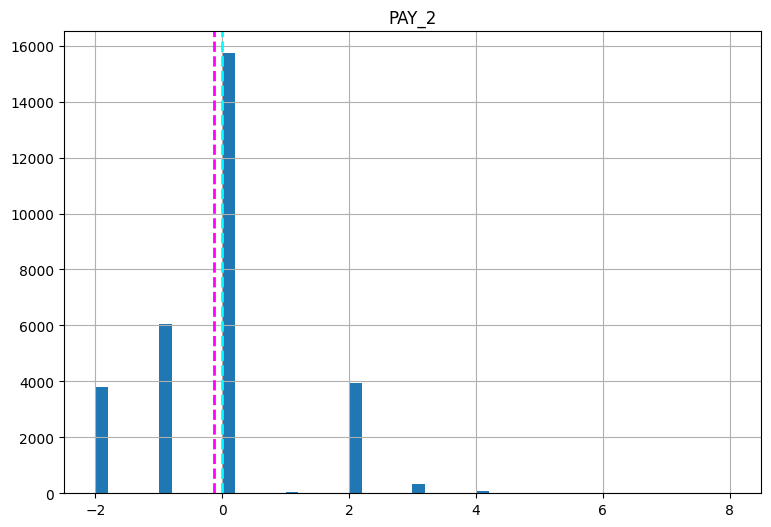

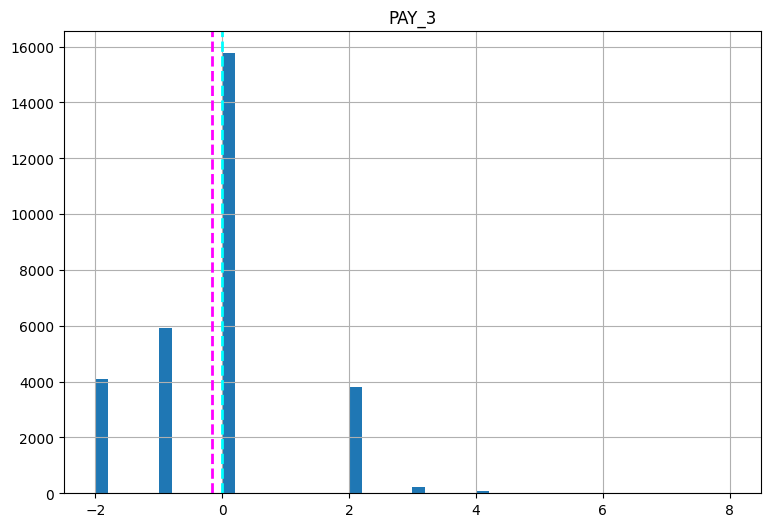

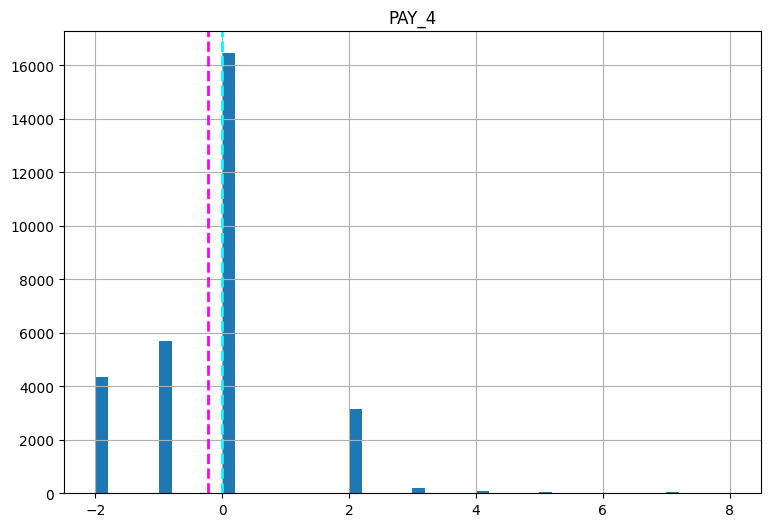

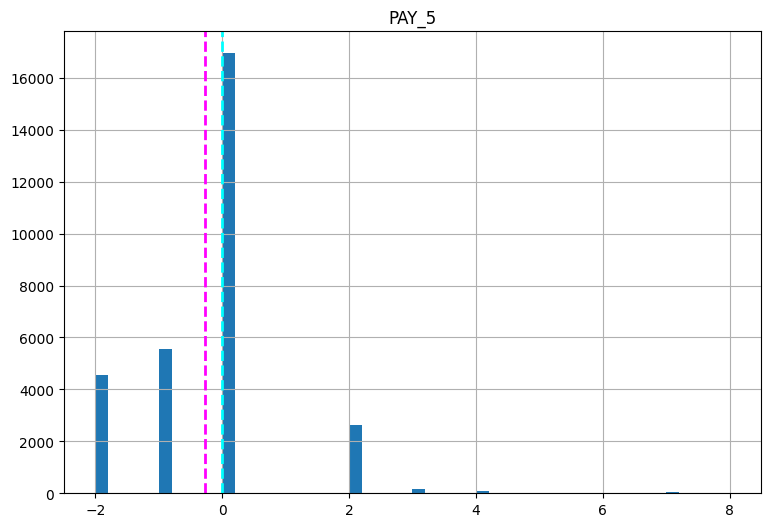

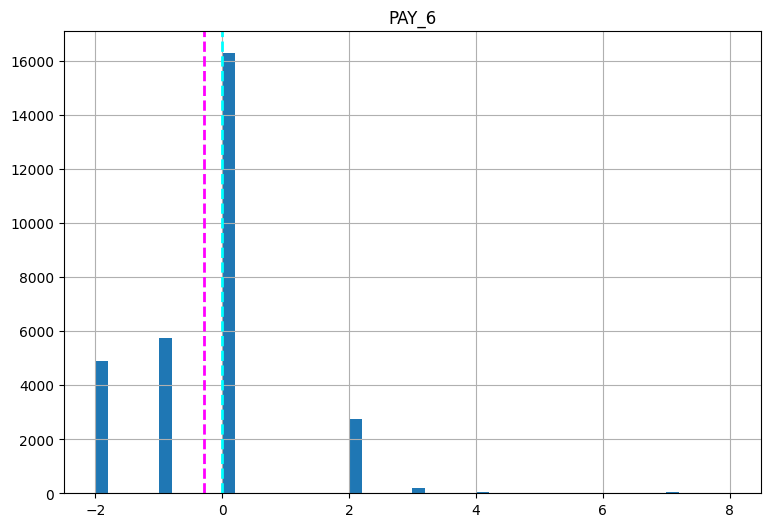

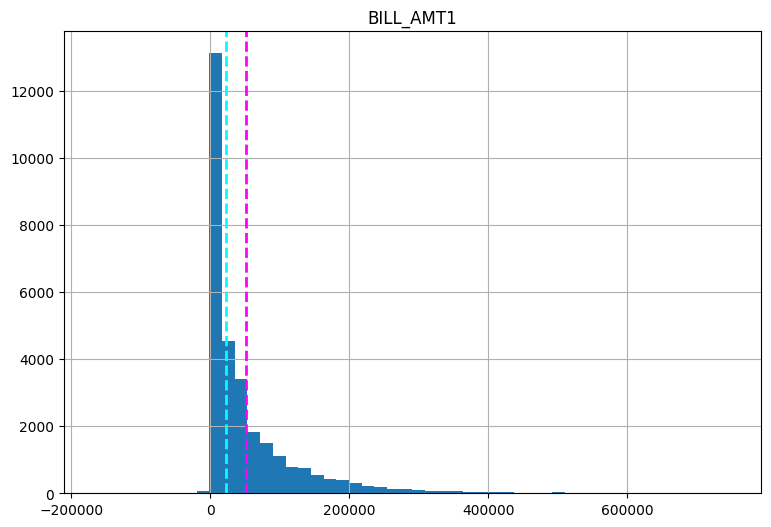

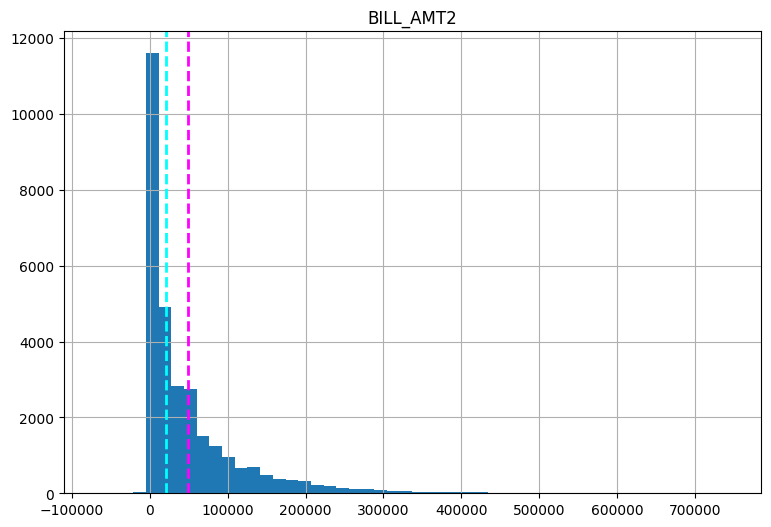

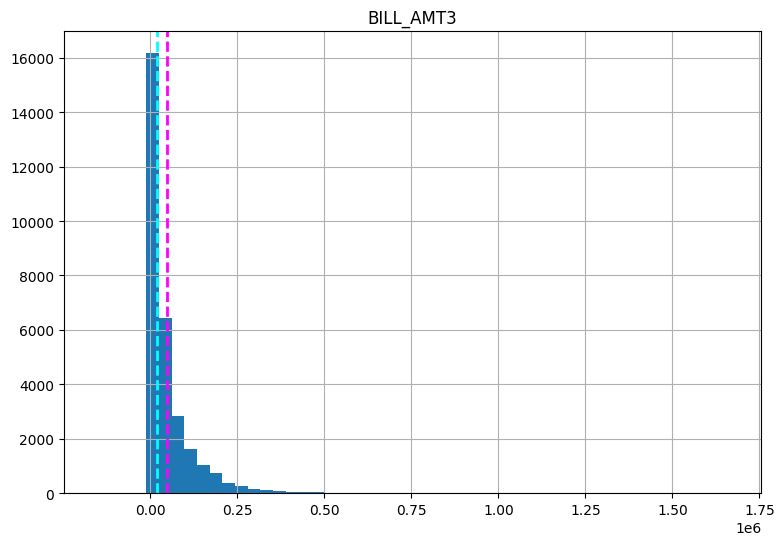

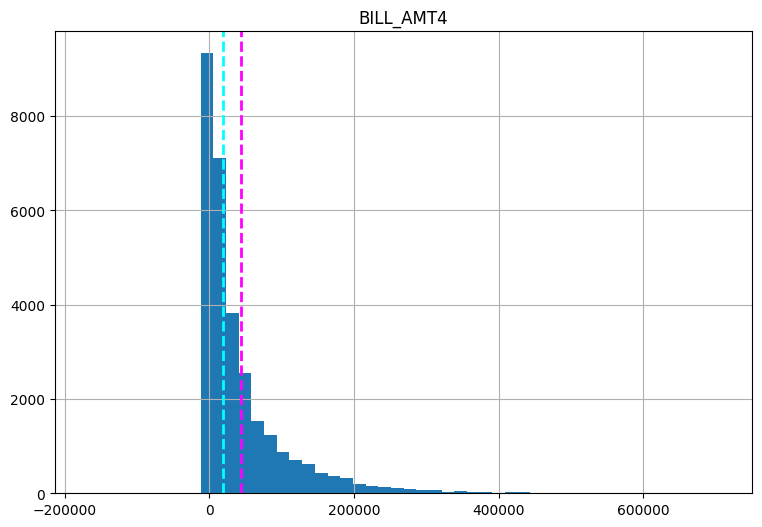

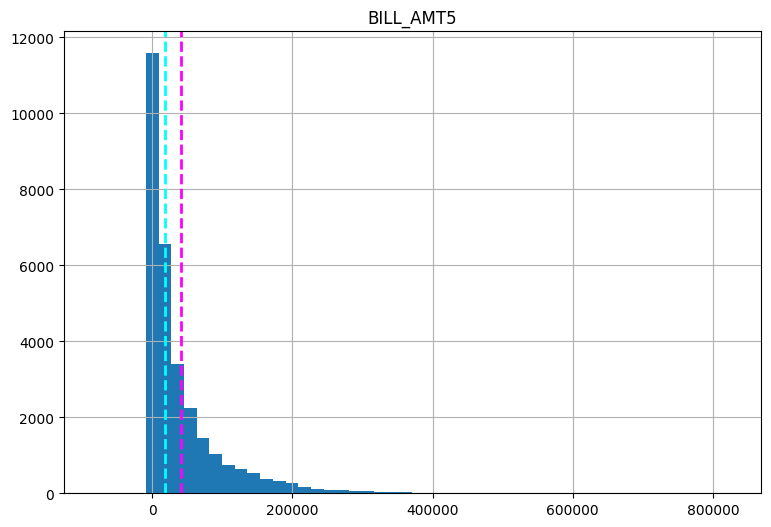

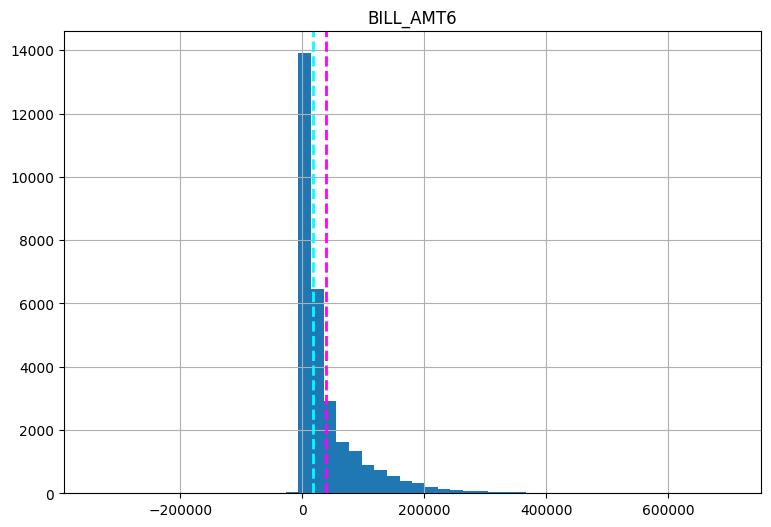

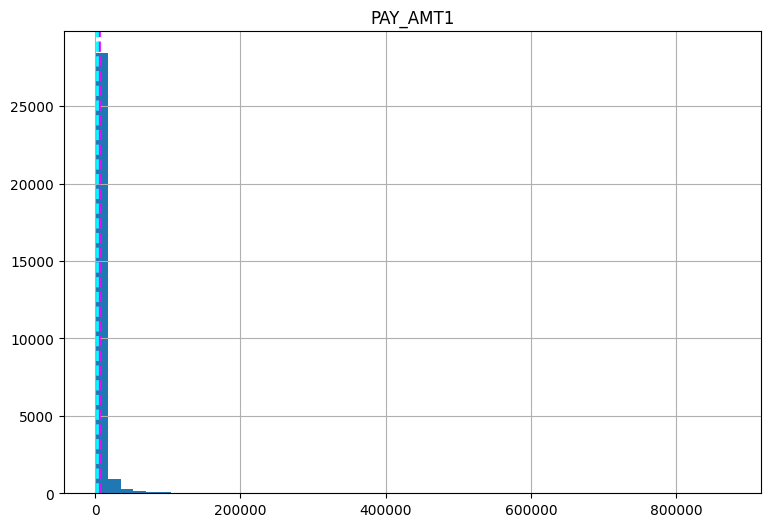

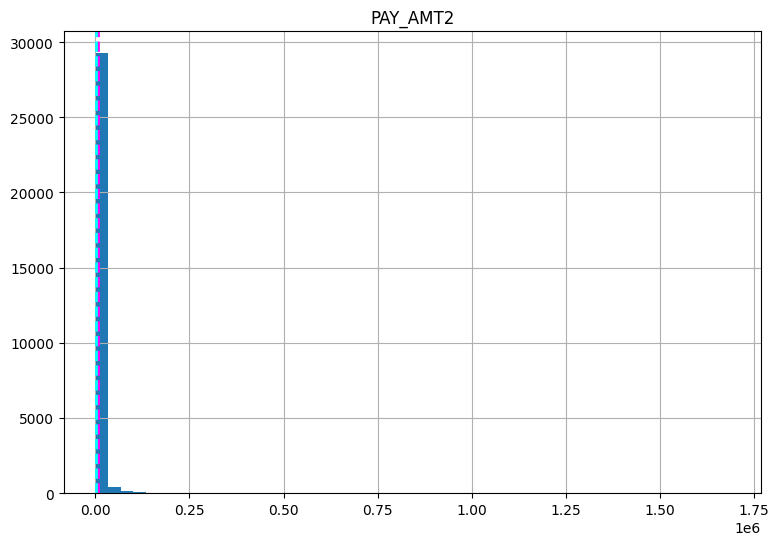

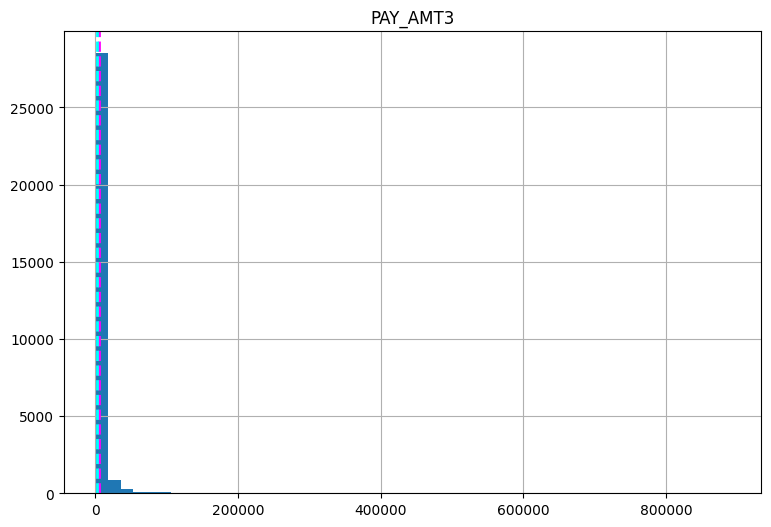

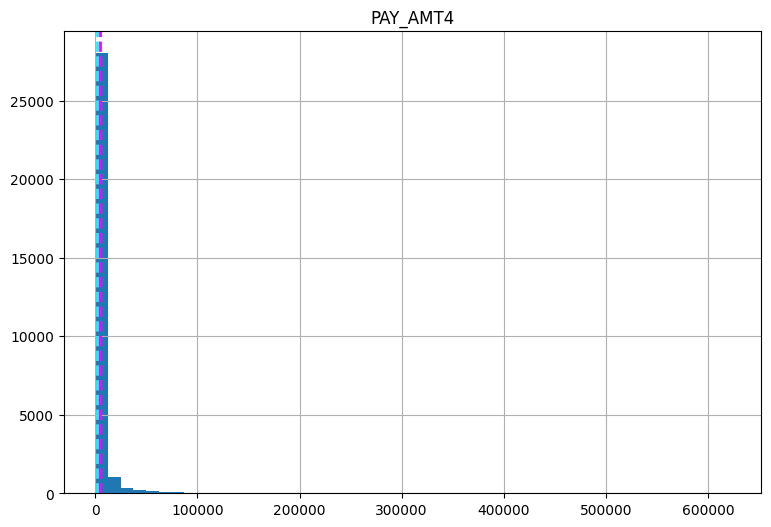

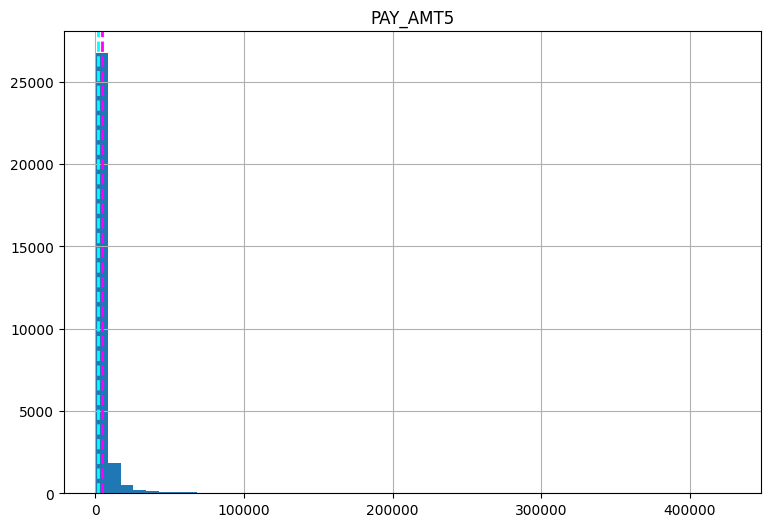

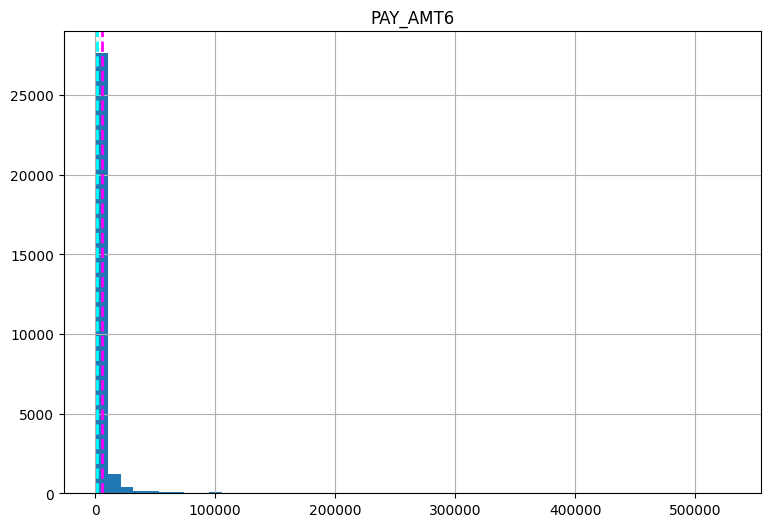

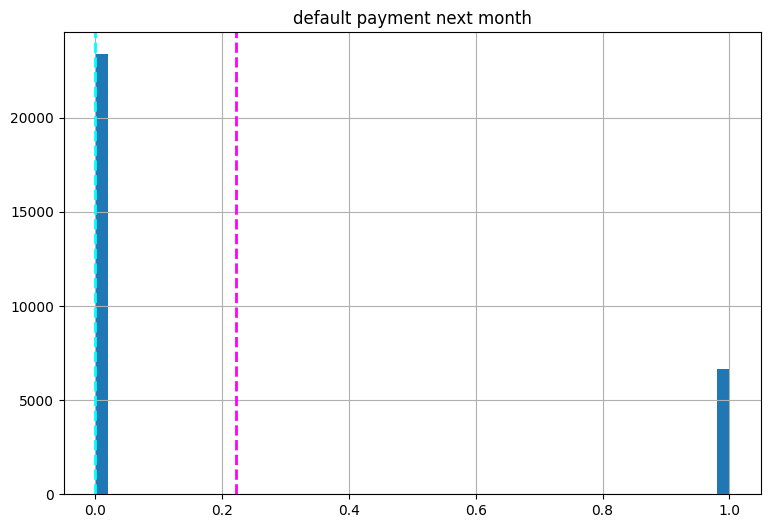

In [36]:
# Transform Your data
for col in df4.columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df4[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)

Except for columns SEX and default payment next month, all other columns are almost normal with slight difference between mean and median. Since these two columns have discrete values we can ignore them and move forward with our dataset.

### 8. Data Splitting

In [52]:
# Split your data to train and test. Choose Splitting ratio wisely.
df5 = df4[(df4['MARRIAGE'] != 0) & (df4['EDUCATION'] != 0) & (df4['EDUCATION'] != 6)]
X = df5.drop(columns=['default payment next month'],axis=1)
Y = df5['default payment next month']

In [53]:
X.EDUCATION.value_counts()

2    14024
1    10580
3     4873
5      280
4      123
Name: EDUCATION, dtype: int64

In [54]:
X.MARRIAGE.value_counts()

2    15933
1    13626
3      321
Name: MARRIAGE, dtype: int64

In [55]:
# y_smote.value_counts()

In [56]:
# x_smote['MARRIAGE'].value_counts()

In [57]:
X['MARRIAGE'].value_counts()

2    15933
1    13626
3      321
Name: MARRIAGE, dtype: int64

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)

In [59]:
# Handling Class Imbalance
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [60]:
# Checking for class imbalance
print(f'\n We see that there is no class imbalance.')
print(y_train.value_counts())
print(y_test.value_counts())


 We see that there is no class imbalance.
0    17425
1     4985
Name: default payment next month, dtype: int64
0    5832
1    1638
Name: default payment next month, dtype: int64


##### What data splitting ratio have you used and why?

A train test ratio of 0.75 and 0.25 will be used to split the data set. This is to avoid any class imbalance.

## ***7. ML Model Implementation***

In [61]:
# Module Class for evaluating Classification Models by Rayed Shamim
class evalModel:
  def __init__(self,model,xTrain,xTest,yTrain,yTest):
    self.model = model
    self.xTrain = xTrain
    self.xTest = xTest
    self.yTest = yTest
    self.yTrain = yTrain
    self.train_pred = self.model.predict(self.xTrain)
    self.test_pred = self.model.predict(self.xTest)
    self.trConMax = confusion_matrix(self.yTrain,self.train_pred)
    self.teConMax = confusion_matrix(self.yTest,self.test_pred)

  # get train and test prediction from model
  def getPrediction(self):
    return self.train_pred, self.test_pred

  # get model accuracy score
  def getAccuracy(self):
    self.trAcc = accuracy_score(self.yTrain,self.train_pred)
    self.teAcc = accuracy_score(self.yTest,self.test_pred)
    return self.trAcc, self.teAcc

  # Get Roc Auc score for train and test
  def getRocAuc(self):
    self.trRocAuc = roc_auc_score(self.yTrain,self.model.predict_proba(self.xTrain)[:,1])
    self.teRocAuc = roc_auc_score(self.yTest,self.model.predict_proba(self.xTest)[:,1])
    return self.trRocAuc, self.teRocAuc

  # get test confusion matrix
  def getTestConfusionMatrix(self):
    return self.trConMax

  # get train confusion matrix
  def getTrainConfusionMatrix(self):
    return self.teConMax

  # get test precision
  def getTestPrecision(self):
    self.testPresicion = self.teConMax[1,1]/(self.teConMax[1,1]+self.teConMax[0,1])
    return self.testPresicion

  # get test recall
  def getTestRecall(self):
    self.testRecall = self.teConMax[1,1]/(self.teConMax[1,1]+self.teConMax[1,0])
    return self.testRecall

### ML Model - 1

In [62]:
# ML Model - 1 Implementation
lg = LogisticRegression(max_iter=1000)
# Fit the Algorithm
lg.fit(x_train,y_train)
# Predict on the model
lg_eval = evalModel(lg,x_train,x_test,y_train, y_test)
lg_train_pred, lg_pred = lg_eval.getPrediction()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [63]:
# Visualizing evaluation Metric Score chart
print(f'The train and test accuracy for this model are {lg_eval.getAccuracy()} respectively.')

The train and test accuracy for this model are (0.7775100401606426, 0.7805890227576975) respectively.


In [64]:
print(f'The ROC AUC score for train and test for this model are {lg_eval.getRocAuc()} respectively')

The ROC AUC score for train and test for this model are (0.6481994102824974, 0.6386976363828216) respectively


In [65]:
# Confusion matrix for test
lg_eval.getTestConfusionMatrix()

array([[17424,     1],
       [ 4985,     0]])

In [66]:
# Confusion matrix for train
lg_eval.getTrainConfusionMatrix()

array([[5831,    1],
       [1638,    0]])

In [67]:
# Precison for test
np.round(lg_eval.getTestPrecision(),3)

0.0

In [68]:
# Recall
np.round(lg_eval.getTestRecall(),3)

0.0

#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lg2 = LogisticRegression()
params = {'max_iter':100*np.arange(3,21)}
grid_lg = GridSearchCV(lg2,params,scoring='roc_auc',cv=5)

# Fit the Algorithm
grid_lg.fit(x_train,y_train)

# Predict on the model
grid_lg_eval = evalModel(grid_lg,x_train, x_test, y_train, y_test)
grid_lg_train_prediction, grid_lg_test_prediction = grid_lg_eval.getPrediction()

In [70]:
print(f'The train and test accuracy for this model are {grid_lg_eval.getAccuracy()} respectively.')

The train and test accuracy for this model are (0.7775100401606426, 0.7805890227576975) respectively.


In [71]:
print(f'The ROC AUC score for train and test for this model are {grid_lg_eval.getRocAuc()} respectively')

The ROC AUC score for train and test for this model are (0.6481994102824974, 0.6386976363828216) respectively


In [72]:
# Confusion Matrix for test
grid_lg_eval.getTestConfusionMatrix()

array([[17424,     1],
       [ 4985,     0]])

In [73]:
# Confusion Matrix for train
grid_lg_eval.getTrainConfusionMatrix()

array([[5831,    1],
       [1638,    0]])

In [74]:
# Test Precision
np.round(grid_lg_eval.getTestPrecision(),3)

0.0

In [75]:
# Test Recall
np.round(grid_lg_eval.getTestRecall(),3)

0.0

##### Which hyperparameter optimization technique have you used and why?

I have used the GridSearchCV optimiztion method and the hyperparameter was max_iter, which was tested for values ranging from 300 to 2000 at 100 incremental rate.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No improvement was seen after tuning the hyperparameter.

### ML Model - 2

In [76]:
# ML Model - 2 Implementation
rf = RandomForestClassifier()
# Fit the Algorithm
rf.fit(x_train,y_train)
# Predict on the model
rf_eval = evalModel(rf,x_train, x_test, y_train, y_test)
rf_train_pred, rf_test_pred = rf_eval.getPrediction()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [77]:
# Visualizing evaluation Metric Score chart
print(f'The train and test accuracy for this model are {rf_eval.getAccuracy()} respectively.')

The train and test accuracy for this model are (0.9994645247657296, 0.815528781793842) respectively.


In [78]:
print(f'The ROC AUC score for train and test for this model are {rf_eval.getRocAuc()} respectively')

The ROC AUC score for train and test for this model are (0.9999917399256593, 0.761666298188932) respectively


In [79]:
# Train Confusion Matrix
rf_eval.getTrainConfusionMatrix()

array([[5475,  357],
       [1021,  617]])

In [80]:
rf_eval.getTestConfusionMatrix()

array([[17423,     2],
       [   10,  4975]])

In [81]:
# Test Precision
rf_eval.getTestPrecision()

0.63347022587269

In [82]:
# Test Recall
rf_eval.getTestRecall()

0.3766788766788767

#### 2. Cross- Validation & Hyperparameter Tuning

In [83]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rf2 = RandomForestClassifier()
params = {'n_estimators':[125,150],'max_depth':[6, 8, 10]}
grid_rf = GridSearchCV(rf2,params,scoring='roc_auc',cv=5)

# Fit the Algorithm
grid_rf.fit(x_train,y_train)

# Predict on the model
grid_rf_eval = evalModel(grid_rf,x_train,x_test,y_train,y_test)
grid_rf_train_pred, grid_rf_test_pred = grid_rf_eval.getPrediction()

In [84]:
print(f'The train and test accuracy for this model are {grid_rf_eval.getAccuracy()} respectively.')
print(f'\nThe ROC AUC score for train and test for this model are {grid_rf_eval.getRocAuc()} respectively')

The train and test accuracy for this model are (0.8562248995983935, 0.8214190093708166) respectively.

The ROC AUC score for train and test for this model are (0.859982167449263, 0.7842456088340863) respectively


In [85]:
# Train Confusion Matrix
grid_rf_eval.getTrainConfusionMatrix()

array([[5535,  297],
       [1037,  601]])

In [86]:
# Test Confusion Matrix
rf_eval.getTestConfusionMatrix()

array([[17423,     2],
       [   10,  4975]])

In [87]:
# Test Precision
rf_eval.getTestPrecision()

0.63347022587269

In [88]:
# Test Recall
rf_eval.getTestRecall()

0.3766788766788767

##### Which hyperparameter optimization technique have you used and why?

I have used n_estimators and max_depth as the hyperparameters. Because in bagging algorithms such as this, multiple decision trees are trained on ramdon bags of sample collected from the dataset and the results are generated from collective predictions of these estimators. So more the number of estimators, higher the chance of increase in accuracy.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, there was no improvement seen. The untuned random forest classifier produced slightly more accurate results than tuned random forest classifier.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

In [89]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have considered the the test accuracy score metric to be most impactful on the business prediction, because it messures how accurately the model has classified the test dataset.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have chosen Random Forest Classifier as my final model for business prediction because it has the highest accuracy score for test dataset which is 82.06 %.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [91]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c5f1db57f634ad172e8425a3ece5def1c8dbcb266b03169f82b87f88426d9a3f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [92]:
import lime.lime_tabular as lmt

In [93]:
explainer = lmt.LimeTabularExplainer(np.array(x_train),feature_names = x_train.columns,
                                                   verbose=True, mode="classification")

In [99]:
fn = rf.predict_proba
exp = explainer.explain_instance(x_test.iloc[0],fn)
exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.383770192652735
Prediction_local [0.25184681]
Right: 0.08


In [103]:
exp = explainer.explain_instance(x_test.iloc[251],fn)
exp.show_in_notebook(show_table=True)

Intercept 0.3109780663152592
Prediction_local [0.42495354]
Right: 0.54


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In the above explainer we can see that the model has predicted 0 i.e. a non-defaulter. Following were important features:
* First Payment
* Credit Balance
* Second Payment



## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [96]:
# Save the File
import pickle

In [97]:
pickle.dump(rf, open('credit-card-classification-model.pk1','wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [98]:
# Load the File and predict unseen data.
rf_model = pickle.load(open('credit-card-classification-model.pk1','rb'))

y_pred = rf_model.predict(x_test)

accuracy_score(y_test,y_pred)

0.815528781793842

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

From all the above analysis, following are the conclusions:

* Clients with credit limit 50,000 default the most.
* Clients with gender class 2 default the most.
* Credit card businesses should prefer higher educated clients to reduced risk of default.
*


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***